## Project name:House Prices:Advanced regression techniques
### The main objective of this project is to predict house prices based on the various features provided in the datasets

## Life cycle in this project
### 1.Data analysis
### 2.Feature Enginneering
### 3.Feature Selection
### 4.Model building
### 5.Model deployment


# EXLORATORY DATA ANALYSIS PHASE

In [1]:
# Data analysis phase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display all columns all data frame
pd.pandas.set_option("display.max_columns",None)


In [2]:
df = pd.read_csv("train.csv",index_col = 0)
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df.shape

(1460, 80)

### Data analysis:
### 1.Missing values
### 2.All the numerical variables
### 3.Distribution of the numerical variables
### 4.Categorical variables
### 5.cardinality of categorical variables
### 6.Outliers
### 7.Relationship between independent and dependent features

## Missing values

In [5]:
# make a list of features with nan values
features_nan = [features for features in df.columns if df[features].isnull().sum() > 1]
# print % of missing values in features with nan
for feature in features_nan:
    print(feature,np.round(df[feature].isnull().mean(),4)," % missing values")

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


### Since there are lot of missing values ,we need to find the relationship between the missing values and the target variable sales price

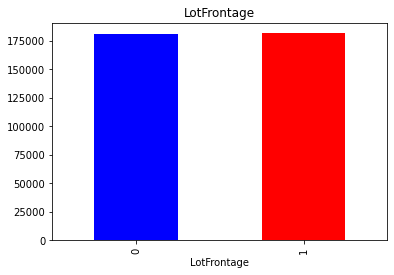

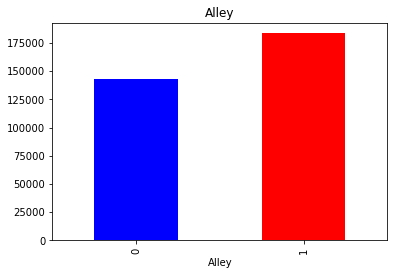

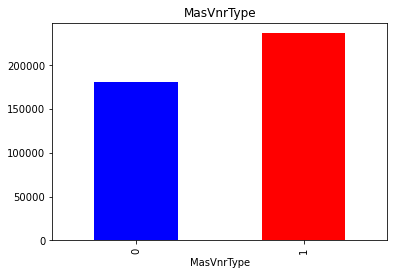

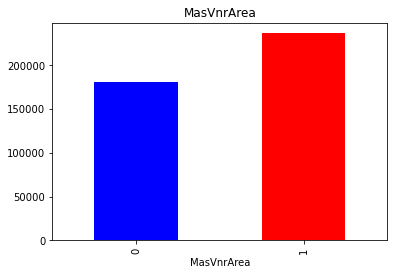

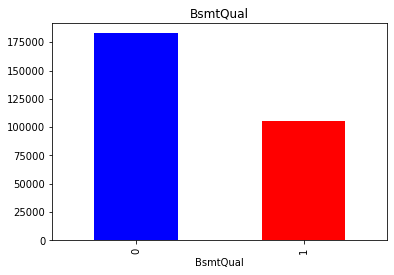

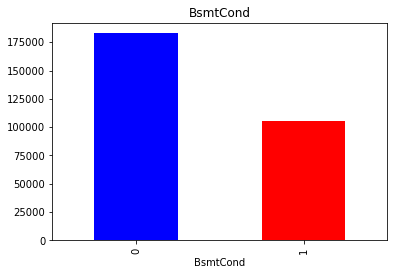

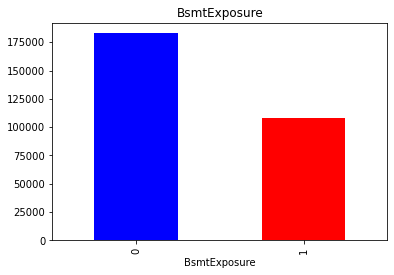

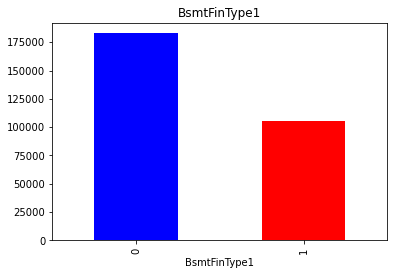

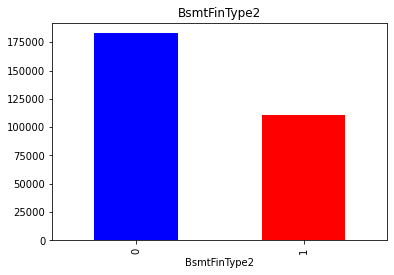

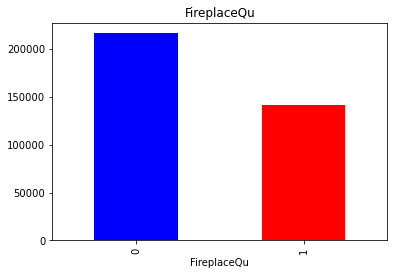

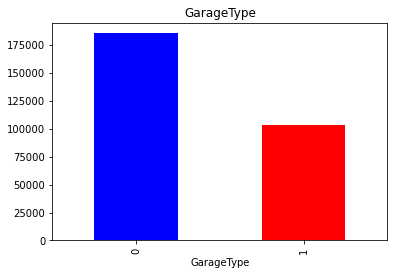

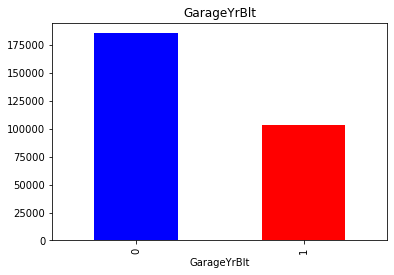

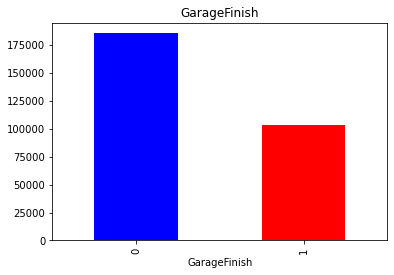

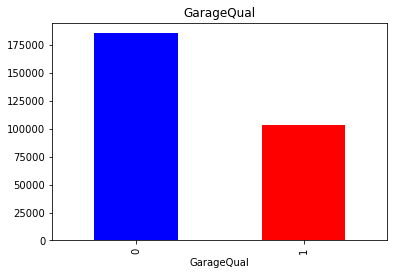

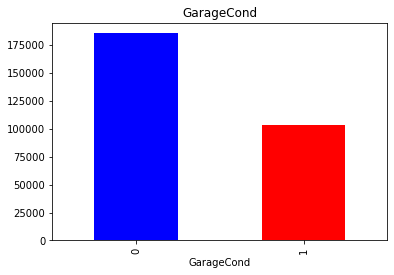

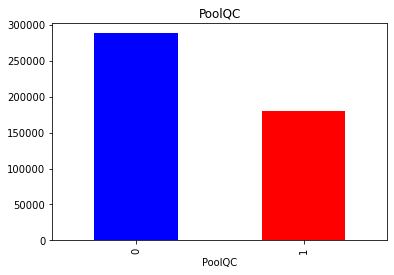

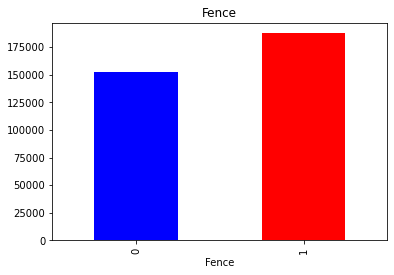

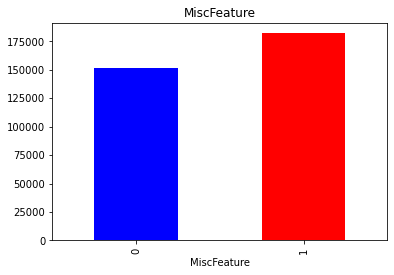

In [6]:
for feature in features_nan:
    data = df.copy()
    # create a variable to indicate 1 if the observation is missing and zero otherwise
    data[feature] = np.where(data[feature].isnull(),1,0)
    # calculate mean sales price for where the information is missing and available
    data.groupby(feature)["SalePrice"].mean().plot.bar(color =["b","r"])
    plt.title(feature)
    plt.show()

#### Observation: With the obvious relationship between missing values and dependent variable.There is need to replace this nan values with something meaningful and this will be done in feature engineering section

## Numerical Variables

In [7]:
df.shape

(1460, 80)

In [8]:
# check how many features are numerical variable
numerical_features = [feature for feature in df.columns if df[feature].dtype!='object']
print("No of numerical features are ",len(numerical_features))
df[numerical_features].head()

No of numerical features are  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal variables: There are four year variables which are temporal;

In [9]:
# list of variables containing years
year_feature = [ feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
df[year_feature].head()


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
Id,,,,
1,2003,2003,2003.0,2008
2,1976,1976,1976.0,2007
3,2001,2002,2001.0,2008
4,1915,1970,1998.0,2006
5,2000,2000,2000.0,2008


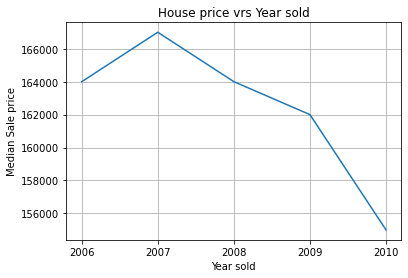

In [10]:
# checdk rel between year sold and saleprice
df.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year sold")

plt.ylabel("Median Sale price")
plt.title("House price vrs Year sold")
year_range = range(2006,2011,1)
plt.xticks(year_range)
plt.grid()
plt.show()


#### Comment:It shows that the price is decreasing as year increases which should'nt be so.Lets compare all other year features with with the Sale price

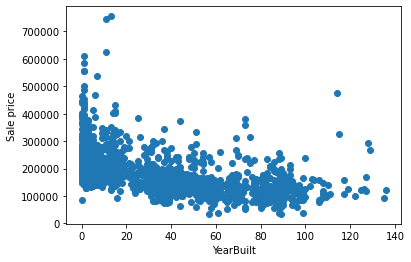

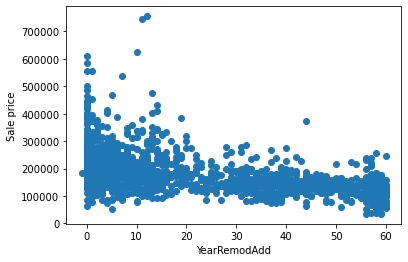

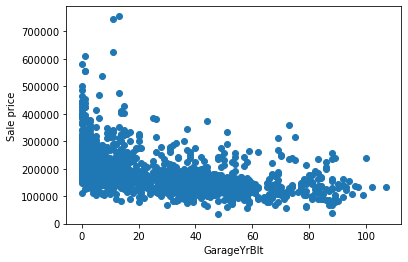

In [11]:
# store all other year feature
for feature in year_feature:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data["YrSold"] - data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sale price")
        plt.title
        plt.show()

### numerical variable: discrete and continnuos
### lets consider these two

In [12]:
# Discrete variable
discrete_features = [ feature for feature in numerical_features if len(df[feature].
                                                                       unique())< 25 and feature not in year_feature + ["Id"]]
print("Total discrete variable is ",len(discrete_features))

Total discrete variable is  17


In [13]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [14]:
# gather information between discrete variables and sales price
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
Id,,,,,,,,,,,,,,,,,
1,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
2,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
3,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
4,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
5,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


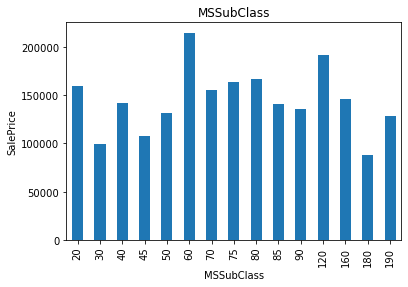

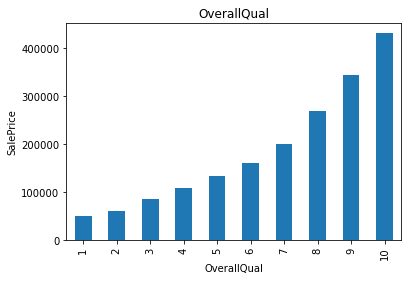

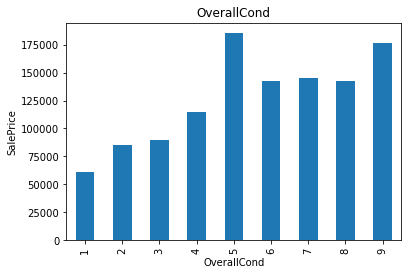

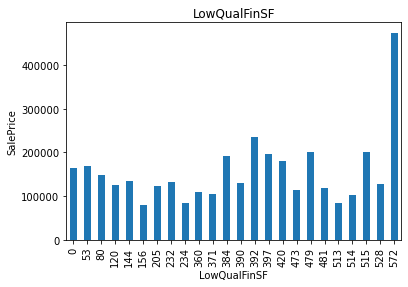

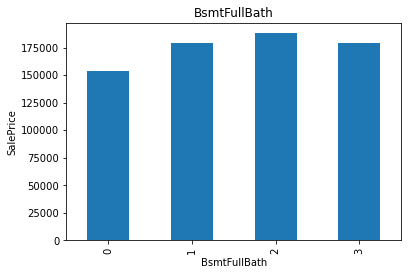

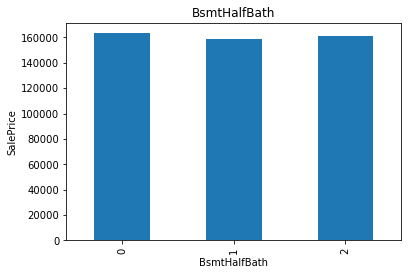

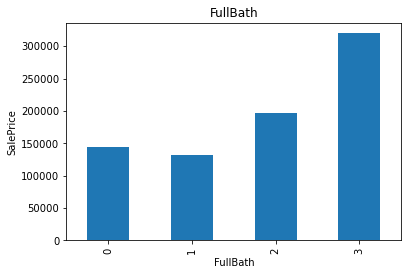

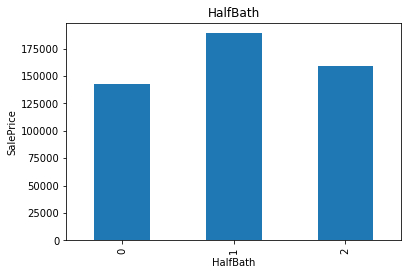

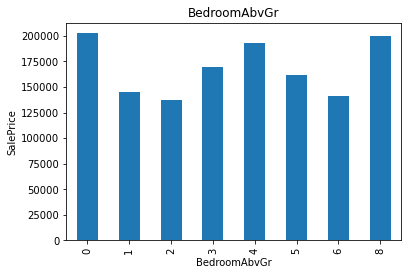

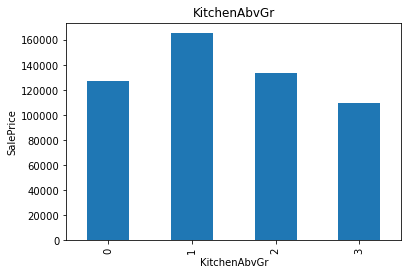

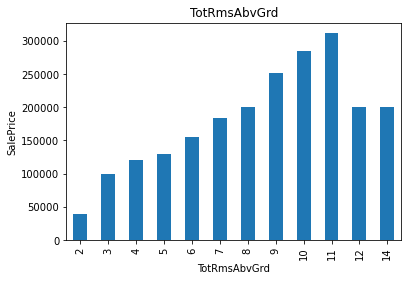

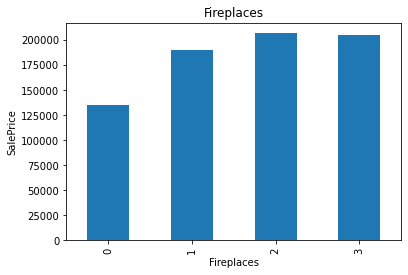

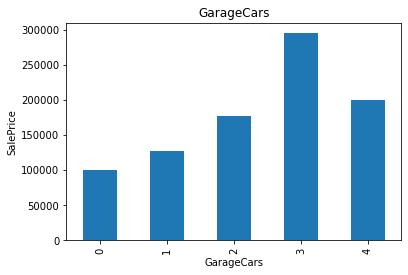

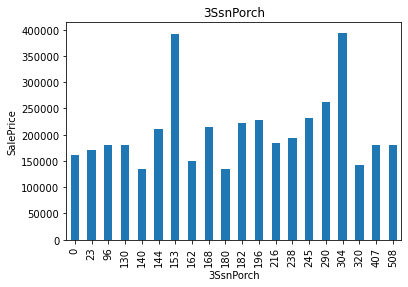

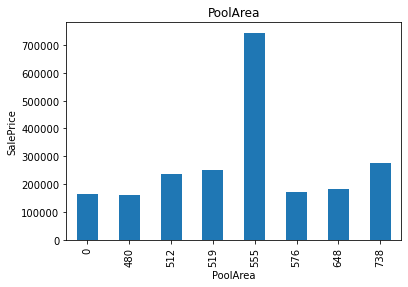

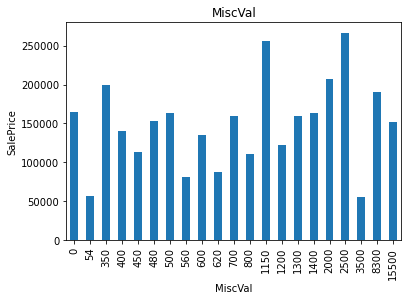

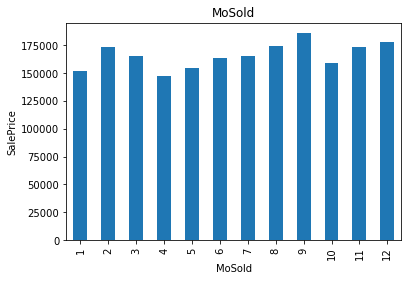

In [15]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    #plt.title(feature," vrs","Saleprice")
    plt.show()

#### Observation: It is seen that there is relationship beween discrete variables and the output

In [16]:
# get a list of continuoos features
cont_features = [feature for feature in numerical_features if feature not in discrete_features + ["Id"]]
print("Number of continuous features is ",len(cont_features))

Number of continuous features is  20


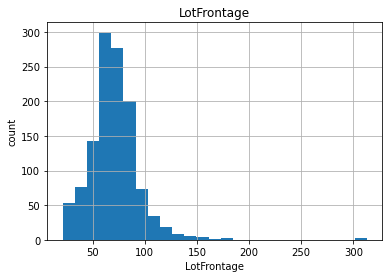

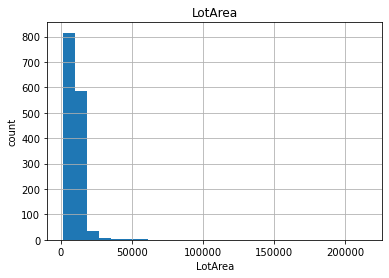

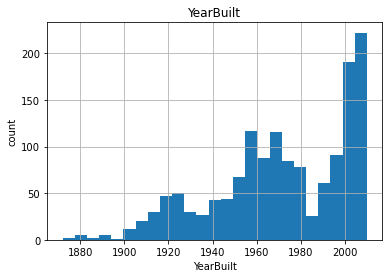

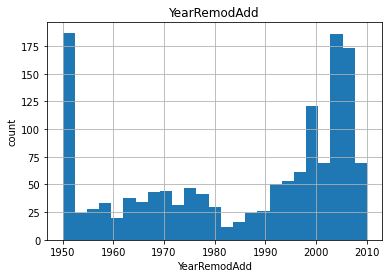

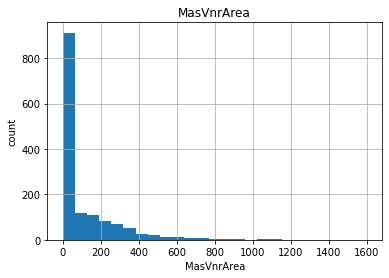

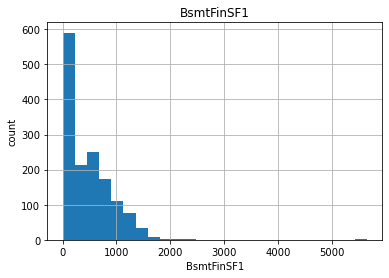

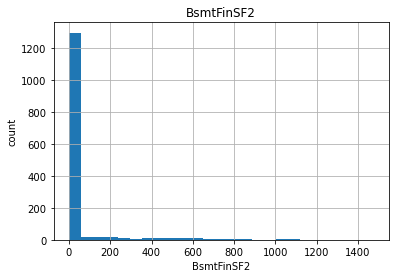

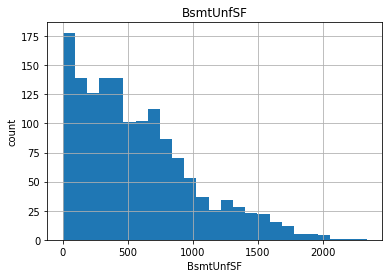

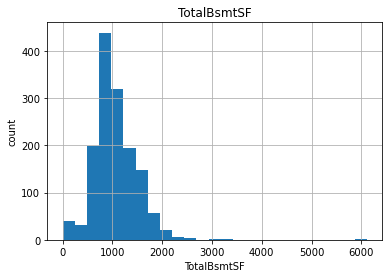

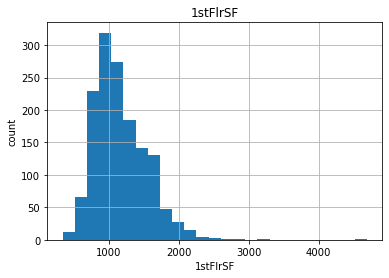

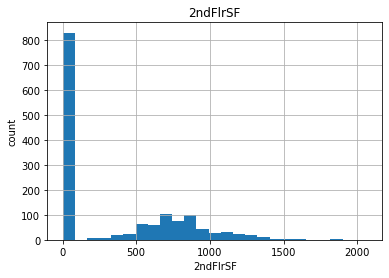

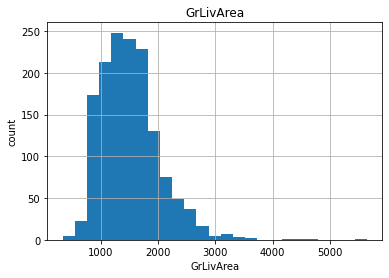

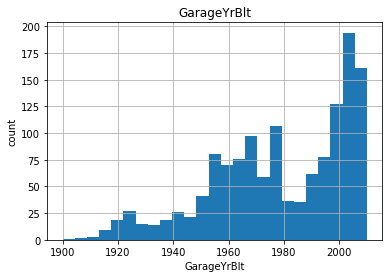

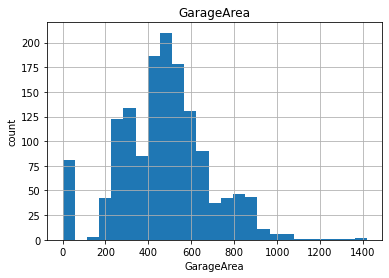

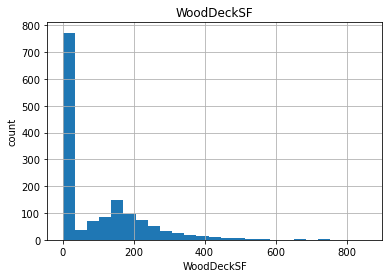

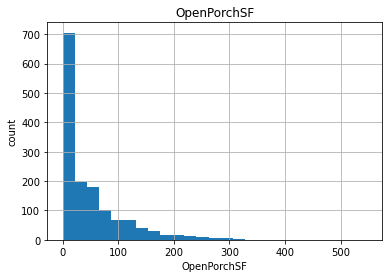

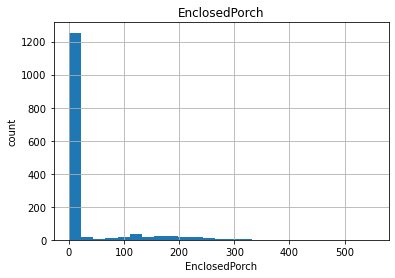

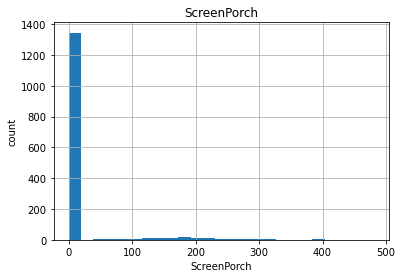

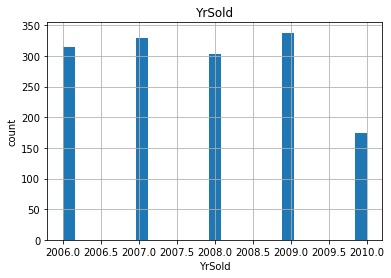

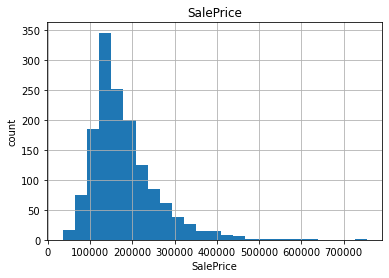

In [17]:
# lets check the distribution of continuous values with histogram
for feature in cont_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

#### Observation: Lotfrontage has guassian distribution but others dont and sales price is normally distributed
                 

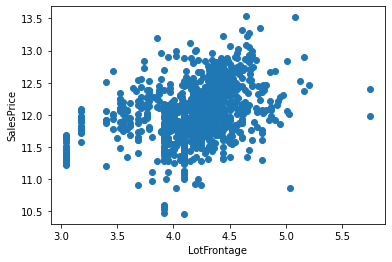

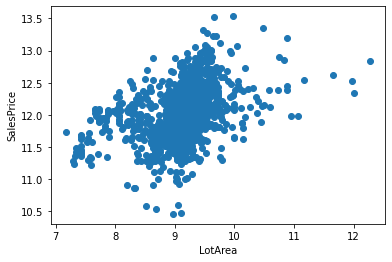

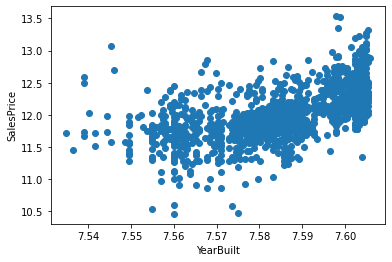

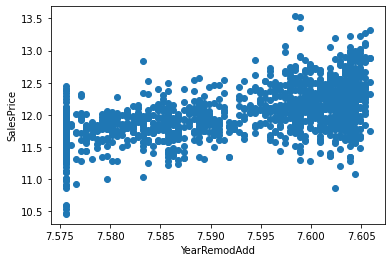

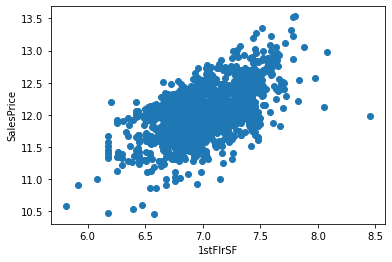

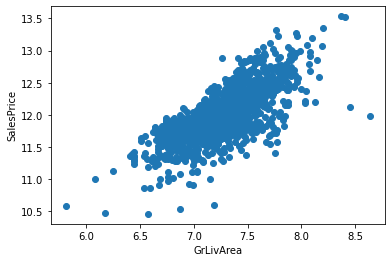

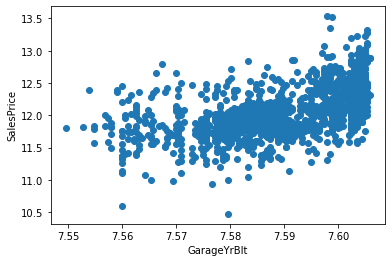

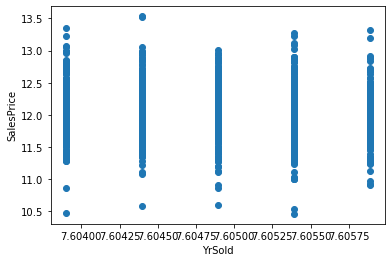

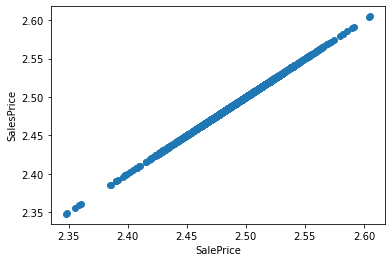

In [18]:
# using logarithmic scale to transform distribution
data = df.copy()
for feature in cont_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data["SalePrice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalesPrice")
        plt.show()
    
